## Machine Learning and Statistics Module 2020 Project

### Author John Dunne G00273895

*****************************************************************************


### Project Specification

#### Instructions


In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.


To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.


### Import the packages to be used in the project

In [1]:
import numpy as np
# pandas imported to read in the csv and display in a pandas dataframe
import pandas as pd 
# matplotlib pyplot will be used for plotting the data set
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in the powerproduction dataset csv and displaying as a pandas dataframe

pandas.read_csv is used to read comma separated value files into a dataframe [1].

In [2]:
# read in the data set with pandas from my repository
df = pd.read_csv("powerproduction.csv")
# display the datas set
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


### Some Statistical Analysis with pandas

#### Dataframe.info()

Dataframe.info prints a concise summary about a dataframe [2].

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#### Dataframe.shape

Dataframe.shape returns a table that shows the number of rows and columns in a dataframe [3].

In [4]:
df.shape

(500, 2)

#### Dataframe.describe()

Dataframe.describe prints a description of each column of data in the data set [4].

**Output of pandas.dataframe.describe() explained:**

* count = total number of rows of data in the data set.
* mean = the central tendency of the data.
* std = standard deviation which is a measurement of the variance of each data point relative to the mean.
* min = the smallest figure collected in each column of data.
* 25% = the 25th percentile - meaning 25% of the total count of measurements collected fall below this measurement.
* 50% = the 50th or median percentile meaning this is the central collected in each column, half of the data collected falls below this measurement and half is above this measurement. Further details on how percentile is calculated can be read here: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/percentiles-rank-range/.
* 75% = the 75th percentile - meaning 75% of the total count of measurements collected fall below this measurement and 25% are above this measurement.
* max = the largest measurement collected kin each column of data.

In [5]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Plot the powerproduction data set

#### matplotlib.pyplot

I will use matplotlib.pyplot to display a plot of the data in the data set [5] customized with some rcParams commands [6].

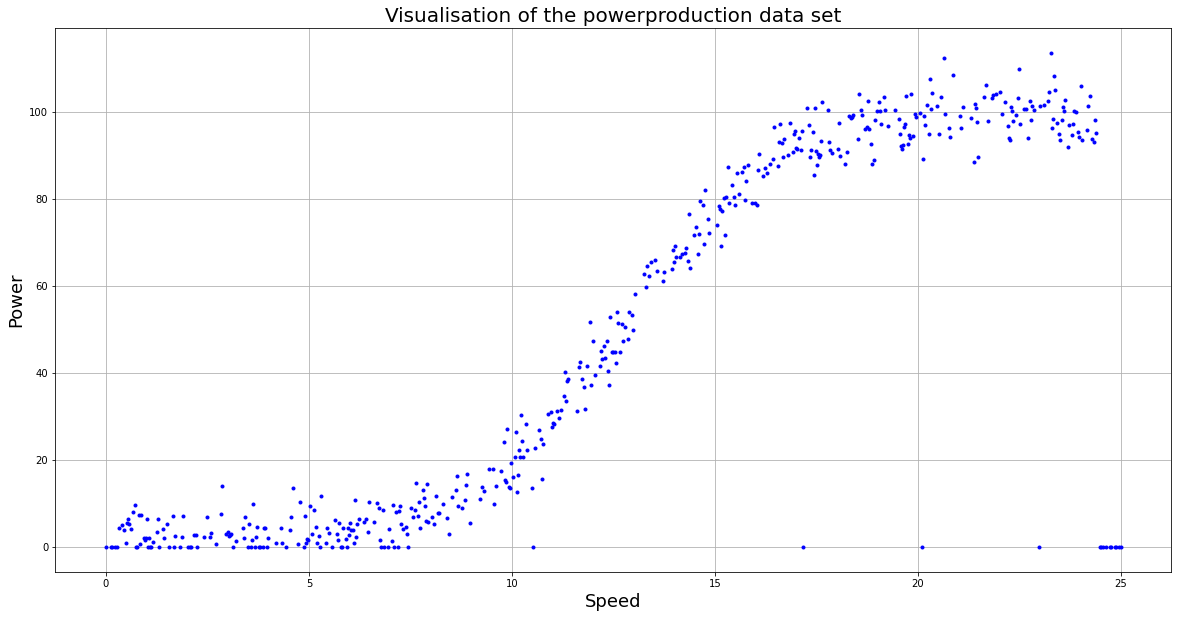

In [6]:
# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2.5

#matplotlib.pyplot used to plot speed and power from the data set
# .b calls for blue dots in the plot
plt.plot(df['speed'], df['power'], '.b')
# add a title to the plot
plt.title('Visualisation of the powerproduction data set', fontsize=20)
# add labels to the x and y axis
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)
# display grid on the plot
plt.grid()
# show the plot
plt.show()


### Seaborn to plot the data set

#### Seaborn Pairplot

Pairplot is used to plot the relationship between variables in a data set. The pairplot function by default plots each variable on the y axis across a single row and the x axis across a single column. Pairplot can read in a data set from pandas df (data frame). The argument hue can be entered to add colour to the plot based on another variable in the data set [7].

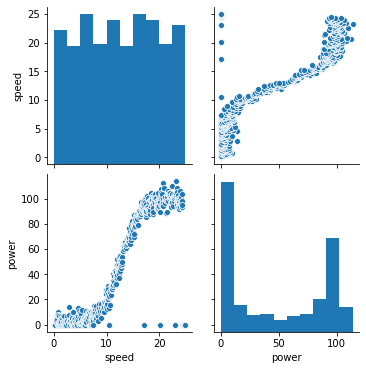

In [7]:
sns.pairplot(df)

With Seaborn pairplot a histogram is plotted by default but this can be changed by adding the diag_kind parameter which can take 3 different parameters:

* hist - plots a histogram 
* kde - density plot 
* auto - the default when hue is selected is denisty, and if hue not selected them histogram

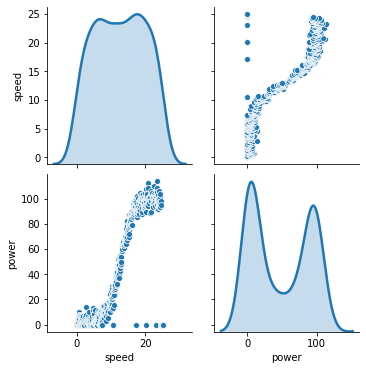

In [8]:
sns.pairplot(df, diag_kind = 'kde')

### What do the above plots say about the data?

* It looks like there are instances where zero power is generated despite high wind speeds. Possibly maintenance on the turbine caused it to be stopped at certain times.
* It looks to me that their is a linear relationship between wind speed and power production. The greater the wind speed the more power is produced. This is what I would have expected without looking at any data. 
* I would think the owners of the turbine though would want any downtime and maintenance etc factored into any forecast for future power production. 
* I find the pyplot gives a very good visual representation of the data and I increased the size using rcparams in order to get a better look at the data points.
* For the most part it looks like the higher the wind speed the more power we could expect to be generated by the turbine. 
* The amount of power generated seems to increase sharply once wind speed of over 10mph are reached. 
* This seems to plateau between 20 and 25 mph wind speed.
* Why does this happen? Maybe I can answer the question later. 

### References

[1] pandas; pandas.read_csv; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

[2] pandas; pandas.dataframe.info; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

[3] pandas; pandas.dataframe.shape; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

[4] pandas; pandas.dataframe.describe; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[5] matplotlib; matplotlib.pyplot documentation; https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

[6] matplotlib; Customizing Matplotlib with style sheets and rcParams; https://matplotlib.org/tutorials/introductory/customizing.html

[7] Seaborn, pairplot; https://seaborn.pydata.org/generated/seaborn.pairplot.html

[8] Towards data science; Visualizing data with pairplots in Python; https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 